In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing dataset
housing = pd.read_csv('housing.csv')

In [3]:
#Checking info of the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [10]:
#Checking header
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00D3E670>,
      dtype=object)

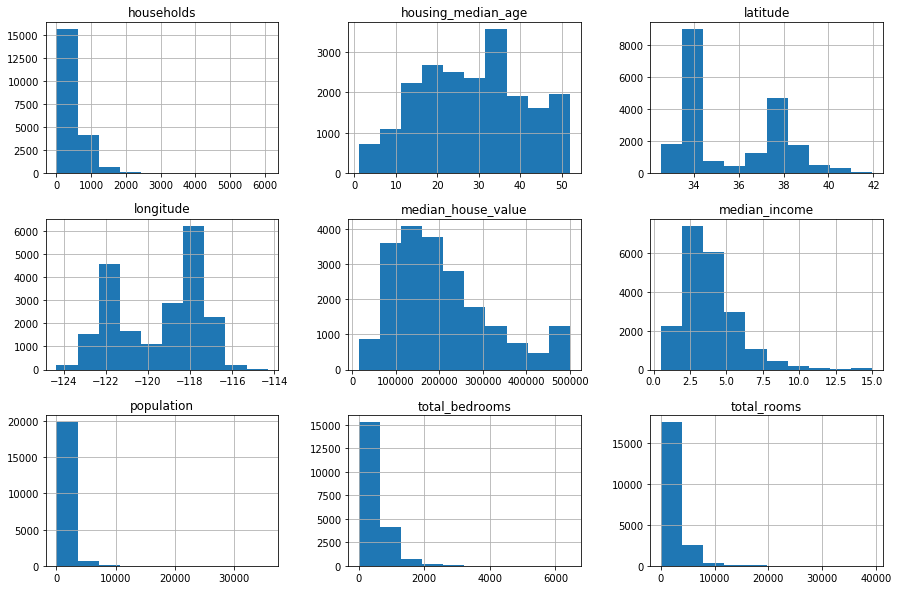

In [11]:
housing.hist(bins=10,figsize=(15,10))

In [6]:
#getting x and y ie features and labels
X = housing.drop('median_house_value', axis= 1).values
y = housing.median_house_value.values

In [7]:
#making the nan values to valued data
from sklearn.preprocessing import Imputer
impute = Imputer(missing_values='NaN',strategy ='mean', axis = 0)
X[:,[4]]  = impute.fit_transform(X[:,[4]])

In [8]:
#encoding labelled data i.e. column ocean_proximity
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
X[:,8] = encode.fit_transform(X[:,8])

In [9]:
from sklearn.preprocessing import OneHotEncoder
onehe = OneHotEncoder(categorical_features=[8])
X = onehe.fit_transform(X).toarray()

In [12]:
x = housing.iloc[:,[2,3,7]].values

In [13]:
#seperating train test data
from sklearn.cross_validation import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state =0)

C:\Users\Raj Kiran\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
#Standardizing X_final and X_test

from sklearn.preprocessing import StandardScaler
ss  = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [15]:
#LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#Defined y_predict
y_prediction = lr.predict(X_test)

In [17]:
#Checking the score for train data
lr.score(X_train,y_train)

0.5196284575917456

In [32]:
#Checking the score for test data
lr.score(X_test,y_test)

0.48826521027801695

In [33]:
#Predicting the model
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_prediction)))


81687.15246248957


In [21]:
# DECISSION TREE
xdt = housing.iloc[:,[2,3,7]].values

In [22]:
from sklearn.cross_validation import train_test_split
X_traindt,X_testdt,y_traindt,y_testdt = train_test_split(xdt,
                                                 y,
                                                 test_size=.2,random_state=0)


In [23]:
#DECISSION TREE MODEL
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state = 0)
dt.fit(X_traindt,y_traindt)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [24]:
dt.score(X_traindt,y_traindt)

1.0

In [26]:
dt.score(X_testdt,y_testdt)

0.12316568402304573

In [28]:
y_predictiondt = dt.predict(X_testdt)

In [31]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_testdt,y_predictiondt))


11433524048.35974


In [34]:
#RANDOM FOREST
xrf = housing.iloc[:,[2,3,7]].values

In [35]:
from sklearn.cross_validation import train_test_split
X_trainxrf,X_testxrf,y_trainxrf,y_testxrf = train_test_split(xrf,
                                                 y,
                                                 test_size=.2, random_state=0)


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_trainxrf,y_trainxrf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
rf.score(X_trainxrf,y_trainxrf)

0.9098121020576865

In [39]:
rf.score(X_testxrf,y_testxrf)

0.460803363248187

In [41]:
y_predictionrf = rf.predict(X_testxrf)

In [42]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_testxrf,y_predictionrf))

7030880978.041667


In [44]:
#Perform Regression with one Independent Variable
#We select Median income since it has higher correlation
X_SLR = housing.median_income.values
X_SLR = X_SLR.reshape(-1,1)


In [45]:
from sklearn.cross_validation import train_test_split
X_trainslr,X_testslr,y_trainslr,y_testslr = train_test_split(X_SLR,
                                                 y,
                                                 test_size=.2, random_state=0)


In [46]:
from sklearn.linear_model import LinearRegression
model_SLR = LinearRegression()
model_SLR.fit(X_trainslr,y_trainslr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
model_SLR.score(X_trainslr,y_trainslr)

0.479914127199415

In [49]:
model_SLR.score(X_testslr,y_testslr)

0.44668468048959453

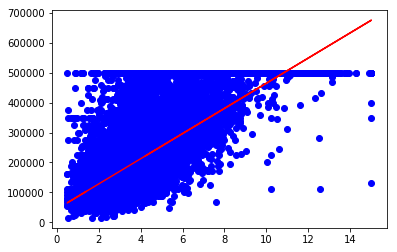

In [50]:
#Ploting on Training Set
plt.scatter(X_trainslr,y_trainslr,color='b')
plt.plot(X_trainslr,model_SLR.predict(X_trainslr), color='r')

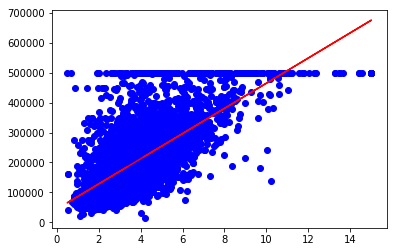

In [53]:
#Ploting on Testing Set
plt.scatter(X_testslr,y_testslr,color='b')
plt.plot(X_testslr,model_SLR.predict(X_testslr), color='r')

